In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from textblob import TextBlob
from google.cloud import language
from google.oauth2 import service_account

%matplotlib inline

from google_api_functions import *

In [2]:
with open('all_years_clean.pickle', 'rb') as f:
    all_years_clean = pickle.load(f)
    f.close()
with open('large_2019_clean.pickle', 'rb') as f:
    large_2019_clean = pickle.load(f)
    f.close()

In [4]:
# generate sentiment scores for all_years tweets using TextBlob
all_years_clean['sentiment'] = [TextBlob(tweet).sentiment.polarity for tweet in all_years_clean['tweet_text']]

In [5]:
# calculate average score by year
all_years_by_year_sentiment = all_years_clean.groupby('tweet_year', as_index = False).sentiment.mean()
all_years_by_year_sentiment

,tweet_year,sentiment
0,2007,0.023924
1,2008,0.060161
2,2009,0.010425
3,2010,0.022603
4,2011,-0.011379
5,2012,0.102060
6,2013,0.006349
7,2014,0.156886
8,2016,0.093940
9,2017,0.094787


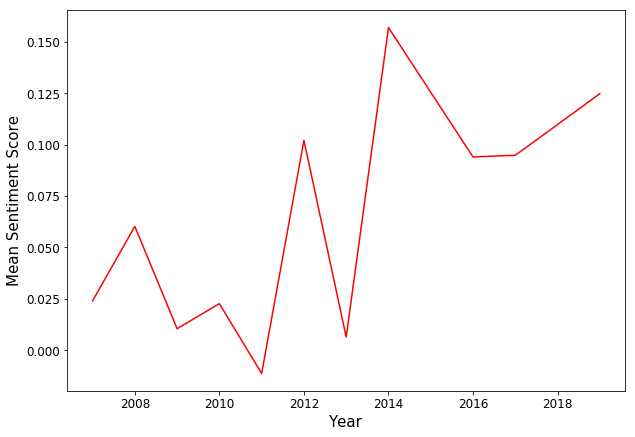

In [6]:
# plot average sentiment over time
plt.figure(figsize = (10, 7))
plt.plot(all_years_by_year_sentiment['tweet_year'], all_years_by_year_sentiment['sentiment'], color = 'red')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean Sentiment Score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('sentiment_by_year_textblob.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [7]:
# generate sentiment scores for large_2019 tweets using TextBlob and binarize (Positive/Negative)
large_2019_clean['sentiment'] = [TextBlob(tweet).sentiment.polarity for tweet in large_2019_clean['tweet_text']]
large_2019_clean['sentiment_binary'] = ['Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative' \
                                        for x in large_2019_clean['sentiment']]

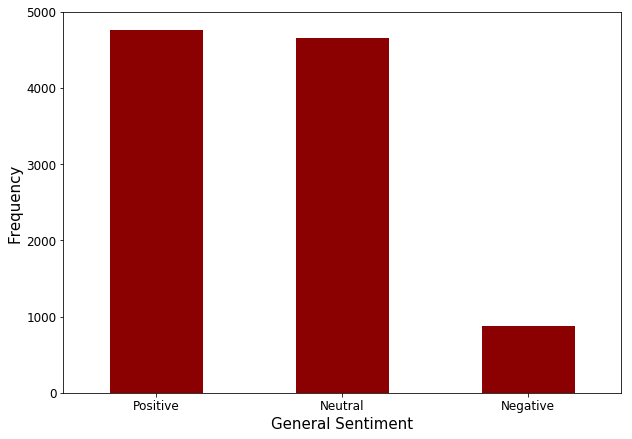

In [8]:
# bar plot of sentiment category frequency in large_2019 dataset
plt.figure(figsize = (10, 7))
large_2019_clean['sentiment_binary'].value_counts().plot.bar(color = 'darkred')
plt.xlabel('General Sentiment', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.savefig('large_2019_sentiment_bar.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [9]:
# show first 10 'negative' tweets
for tweet in large_2019_clean.loc[large_2019_clean['sentiment_binary'] == 'Negative']['tweet_text']\
    .unique()[0:10]:
    print(tweet, '\n')

once you combine this gigantic amorphous mass the human gene code with programming the results are far beyond the capacity meager imagination ranted enough gotta earn living that the government can give money away fin 

animation shows the random appearance fast radio bursts frbs across the sky astronomers have discovered about since and pinpointed two them 

keep telling everyone that not battle ready you cannot put these blackboxes sensitive applications where wrong decisions adversely affect human lives 

not sure want built the lowest bidder 

these robot doctors are saving lives uin remote canada 

this video may not real claire wardle video leah varjacques and taige jensen 

racial bias observed hate speech detection algorithm from google 

mastering increasingly complex tasks head spinning pace google researchers built open sourced soccer simulator train next gen machine learning algorithms from 

tests wildfire tracking are just months away military jaic says fedscoop 

masteri

In [10]:
# show first 10 'positive' tweets
for tweet in large_2019_clean.loc[large_2019_clean['sentiment_binary'] == 'Positive']['tweet_text']\
    .unique()[0:10]:
    print(tweet, '\n')

you believe the power education then vote bring uipath panel and together with and address the most pressing reskilling challenges and opportunities 

mikequindazzi steps build responsible for the via mikequindazzi 

humbled named top amp influencers how dunno but learning never ends ethos how met your mother the gentleman gesture amp sherpas trust buy their stuff 

probably the best clip promote and showing off its performance via 

new mobility defined new technology from wireless the internet things also the global economy biggest disruptor amp could save the planet from what else does new mobility have store 

excited hear how designing for studio taught better human via austin chat meetup 

great conversation about for and with with our very own awesome job jen glad you are 

researchers have developed new system help radiologists improve their ability diagnose prostate cancer 

today revolution more evolution 

low code application platforms have made their way into the enterpris

In [13]:
# need to have Google Cloud Natural Language API enabled and API key file downloaded for this to work
# see https://cloud.google.com/docs/authentication/getting-started
# DO NOT do the 'export GOOGLE_APPLICATION_CREDENTIALS...' step as recommended - does not 
# work with Jupyter Notebook. Use code like below instead
credentials = service_account.Credentials.from_service_account_file('google_credentials.json')
client = language.LanguageServiceClient(credentials = credentials)

In [15]:
# test Google Cloud Natural Language API sentiment analysis
get_sentiment_scores(all_years_clean['tweet_text'][0:2], client)

[0.6000000238418579, 0.0]

In [ ]:
# generate sentiment scores for all_years tweets using Google API
all_years_clean2 = all_years_clean.copy()
all_years_clean2['sentiment2'] = get_sentiment_scores(all_years_clean['tweet_text'], client)

In [ ]:
# binarize sentiment scores
all_years_clean2['sentiment2_binary'] = ['Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative' \
                                        for x in all_years_clean2['sentiment2']]

In [ ]:
# save data
all_years_clean2.to_pickle('all_years_clean_sentiment.pickle')

In [17]:
#all_years_clean2 = pickle.load(open('all_years_clean_sentiment.pickle', 'rb'))
all_years_clean2.head()

,ID,tweet_text,tweet_year,tweet_location,sentiment2,sentiment2_binary
0,544845252,anyone involved work specifically anyone know ...,2007,"Malham Close, Crawley, West Su",0.6,Positive
1,532130162,paradigms programming case studies common lisp,2007,"JP (Japan, Japan)",0.0,Neutral
2,531926162,update geekgirl love and sex with robots advan...,2007,Melbourne,0.8,Positive
3,524153882,speilberg movie based brian aldiss short story...,2007,Barsoom!,0.5,Positive
4,523822582,paradigms programming,2007,"JP (Japan, Japan)",0.1,Positive


In [18]:
# which tweets had no sentiment score calculated? looks like non-english ones
all_years_clean2[all_years_clean2['sentiment2'].isna()]

,ID,tweet_text,tweet_year,tweet_location,sentiment2,sentiment2_binary
335,1046815141,wie kent mensen die mij meer kunnen vertellen ...,2008,Groningen,NaN,Negative
376,1037986324,wat fucking hell briljant,2008,"Rotterdam, Netherlands",NaN,Negative
503,1010149154,over wel een beetje leesbaar,2008,eindhoven,NaN,Negative
523,1005189905,era copii siguran auzit sau zut povestea lui p...,2008,Bucuresti,NaN,Negative
637,975130243,ben san jose cool remember beste die die ons o...,2008,"Den Haag, The Netherlands",NaN,Negative
904,7161123789,hiiiy seram dia main kan,2009,NaN,NaN,Negative
1492,20441834165637120,karna takut speedy sanggup maka match lawan at...,2010,Indonesia,NaN,Negative
1495,20436630728867840,kenapa diterjemahkan menjadi kecerdasan buatan...,2010,Indonesia,NaN,Negative
1507,20425169025638400,gak guna hidup sampai thn krn manusia tak efis...,2010,NaN,NaN,Negative
1698,153218127424012288,word wel weer chill vanavond,2011,NaN,NaN,Negative


In [19]:
# remove the non-english tweets
all_years_clean2 = all_years_clean2[~all_years_clean2['sentiment2'].isna()]

In [20]:
# save again
all_years_clean2.to_pickle('all_years_clean_sentiment2.pickle')

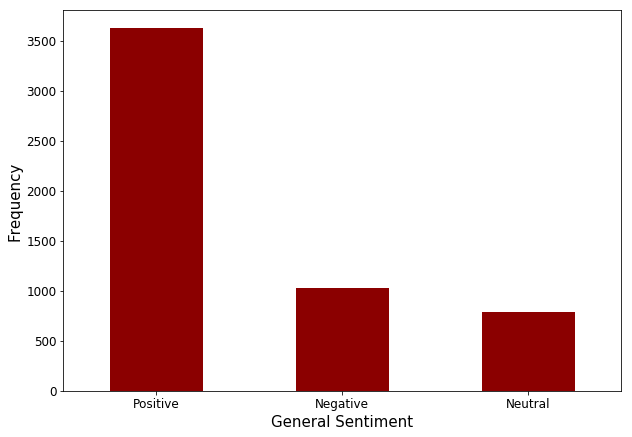

In [21]:
# bar plot of the sentiment category frequencies for all_years tweets calculated via Google API
plt.figure(figsize = (10, 7))
all_years_clean2['sentiment2_binary'].value_counts().plot.bar(color = 'darkred')
plt.xlabel('General Sentiment', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.savefig('all_years_sentiment_bar.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [22]:
# calculate mean sentiment score by year
all_years_by_year_sentiment2 = all_years_clean2.groupby('tweet_year', as_index = False).sentiment2.mean()
all_years_by_year_sentiment2

,tweet_year,sentiment2
0,2007,0.182412
1,2008,0.162041
2,2009,0.235102
3,2010,0.135091
4,2011,0.055852
5,2012,0.135113
6,2013,0.216667
7,2014,0.263253
8,2016,0.233199
9,2017,0.300337


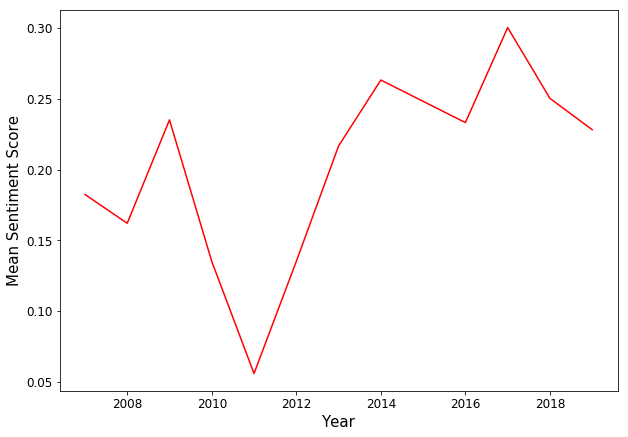

In [24]:
# plot mean sentiment score over time
plt.figure(figsize = (10, 7))
plt.plot(all_years_by_year_sentiment2['tweet_year'], all_years_by_year_sentiment2['sentiment2'], color = 'red')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Mean Sentiment Score', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('sentiment_by_year_googlecloud.png', dpi = 100, bbox_inches = 'tight')
plt.show()
plt.close()

In [25]:
# show first 10 'negative' all_years tweets
for tweet in all_years_clean2.loc[(all_years_clean2['sentiment2_binary'] == 'Negative') &\
                                  (all_years_clean2['tweet_year'] == 2011)]['tweet_text'].unique()[0:10]:
    print(tweet, '\n')

match for natural stupidity author unknown 

calvin before work why don something about natural stupidity 

match for natural stupidity 

hey will never match for natural stupidity 

will never match for natural stupidity 

how did you get into seemed logical didn have any real 

before work why dont try something about natural stupidity 

new year revellers match for natural stupidity 

chatbots chat bots eventbrite 

simulating program for son science project not sure what this says about 

